# NLP and Text minning

In [5]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------------- 624.3/624.3 kB 24.1 MB/s eta 0:00:00


## import dependencies

In [8]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dnyan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


# Task 1: Data Exploration and Preprocessing

In [15]:
# Load dataset
df = pd.read_csv("blogs.csv")

In [17]:
# Function for text preprocessing
def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    tokens = text.split()  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)

In [19]:
# Apply preprocessing
df["Cleaned_Data"] = df["Data"].apply(preprocess_text)

In [21]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df["Cleaned_Data"])

In [23]:
# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["Labels"])

# Task 2: Naive Bayes Model for Text Classification

In [26]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [28]:
# Train Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [30]:
# Predictions
y_pred = nb_classifier.predict(X_test)

In [32]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8375
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.70      0.89      0.78        18
 comp.os.ms-windows.misc       0.91      0.91      0.91        22
comp.sys.ibm.pc.hardware       0.80      0.80      0.80        25
   comp.sys.mac.hardware       0.86      0.90      0.88        21
          comp.windows.x       0.95      0.84      0.89        25
            misc.forsale       1.00      0.78      0.88        18
               rec.autos       0.90      1.00      0.95        18
         rec.motorcycles       1.00      0.94      0.97        16
      rec.sport.baseball       0.84      0.89      0.86        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.90      1.00      0.95        19
         sci.electronics       0.65      0.69      0.67        16
                 sci.med       0.8

# Task 3: Sentiment Analysis# Task 3: Sentiment Analysis

In [37]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Cleaned_Data"].apply(get_sentiment)

In [39]:
# Sentiment Distribution
sentiment_distribution = df["Sentiment"].value_counts(normalize=True) * 100
print("Sentiment Distribution:\n", sentiment_distribution)

Sentiment Distribution:
 Positive    72.65
Negative    27.20
Neutral      0.15
Name: Sentiment, dtype: float64


# Task 4: Evaluation & Visualization

In [42]:
# Sentiment per Category
category_sentiment = df.groupby("Labels")["Sentiment"].value_counts(normalize=True).unstack() * 100

<Figure size 1200x600 with 0 Axes>

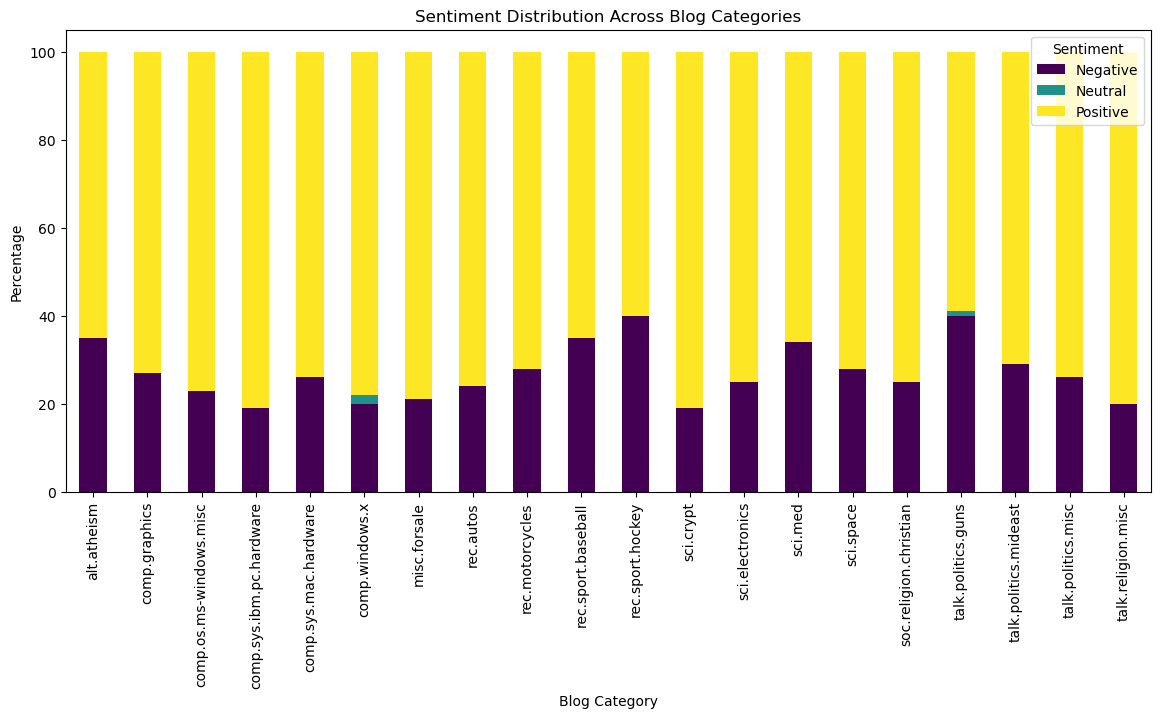

In [44]:
# Plot Sentiment Distribution
plt.figure(figsize=(12, 6))
category_sentiment.plot(kind="bar", stacked=True, colormap="viridis", figsize=(14, 6))
plt.title("Sentiment Distribution Across Blog Categories")
plt.ylabel("Percentage")
plt.xlabel("Blog Category")
plt.xticks(rotation=90)
plt.legend(title="Sentiment")
plt.show()